**KELOMPOK 15**

**Kelas 2024C dan UNJ**

1.   **Shafa Fatimah Az Zahra	(1314623062)**
2.   **Yanaka Sofia Pardede		(24031554065)**
1.   **Putri Sofiyatus Salwa	(24031554112)**






In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **DATA CLEANING & DATA INTEGRASI**



##**CLEANING & INTEGRASI DATA BMKG**

In [2]:
import pandas as pd
import os

provinsi_list = [
    "Banten",
    "DKI Jakarta",
    "Jawa Barat",
    "Jawa Tengah",
    "DI Yogyakarta",
    "Jawa Timur"
]

base_folder = "/content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/Data Mentah_BMKG"

gabungan_folder = "/content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/DATA_GABUNGAN AWAL_BMKG"

for prov in provinsi_list:
    folder_path = os.path.join(base_folder, prov)
    output_path = os.path.join(gabungan_folder, f"{prov}_curah_hujan_gabungan.xlsx")

    data_list = []

    if not os.path.exists(folder_path):
        print(f" Folder tidak ditemukan: {folder_path}")
        continue

    for file_name in os.listdir(folder_path):
        if file_name.endswith(".xlsx"):
            file_path = os.path.join(folder_path, file_name)
            try:

                df = pd.read_excel(file_path, skiprows=7, usecols=[0, 1], engine='openpyxl')
                df.columns = ["TANGGAL", "PR"]

                df = df[~df["TANGGAL"].astype(str).str.contains("TANGGAL", case=False, na=False)]
                df = df[~df["PR"].astype(str).str.contains("PR", case=False, na=False)]

                df["PR"] = df["PR"].replace(["-", 8888, 9999, "8888", "9999"], pd.NA)

                df["TANGGAL"] = pd.to_datetime(df["TANGGAL"], errors="coerce", dayfirst=True)
                df["PR"] = pd.to_numeric(df["PR"], errors="coerce")

                df = df.dropna(subset=["TANGGAL", "PR"])

                df["TANGGAL"] = df["TANGGAL"].dt.date

                data_list.append(df)

            except Exception as e:
                print(f" Gagal membaca {file_name} di {prov}: {e}")

    if data_list:
        gabungan = pd.concat(data_list, ignore_index=True)
        gabungan = gabungan.drop_duplicates(subset=["TANGGAL", "PR"])
        gabungan = gabungan.sort_values("TANGGAL").reset_index(drop=True)

        gabungan.to_excel(output_path, index=False)

    else:
        print(f" Tidak ada file Excel yang valid di folder {prov}.")

print("\n Semua provinsi selesai diproses!")


 Semua provinsi selesai diproses!


##**RATA-RATA DATA CURAH HUJAN PERBULAN**

In [3]:
import pandas as pd
import os

folder_gabungan = "/content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/DATA_GABUNGAN AWAL_BMKG"
hasil_aggregat = "/content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/Data Aggregat_BMKG"

os.makedirs(folder_gabungan, exist_ok=True)
os.makedirs(hasil_aggregat, exist_ok=True)

excel_files = [f for f in os.listdir(folder_gabungan) if f.endswith("_gabungan.xlsx")]

if not excel_files:
    print(" Tidak ada file gabungan ditemukan!")
else:
    for file_name in excel_files:
        file_path = os.path.join(folder_gabungan, file_name)

        provinsi_name = file_name.replace("_curah_hujan_gabungan.xlsx", "")

        df = pd.read_excel(file_path)

        df["Provinsi"] = provinsi_name

        df["TANGGAL"] = pd.to_datetime(df["TANGGAL"], errors="coerce")
        df["Bulan"] = df["TANGGAL"].dt.month_name()

        df_bulanan = (
            df.groupby(["Provinsi", "Bulan"], as_index=False)["PR"]
            .mean()
            .round(2)
        )

        bulan_mapping = {
            "January": "Januari", "February": "Februari", "March": "Maret",
            "April": "April", "May": "Mei", "June": "Juni",
            "July": "Juli", "August": "Agustus", "September": "September",
            "October": "Oktober", "November": "November", "December": "Desember"
        }
        df_bulanan["Bulan"] = df_bulanan["Bulan"].map(bulan_mapping)

        bulan_urut = [
            "Januari", "Februari", "Maret", "April", "Mei", "Juni",
            "Juli", "Agustus", "September", "Oktober", "November", "Desember"
        ]
        df_bulanan["Bulan"] = pd.Categorical(df_bulanan["Bulan"], categories=bulan_urut, ordered=True)
        df_bulanan = df_bulanan.sort_values("Bulan").reset_index(drop=True)

        df_bulanan = df_bulanan.rename(columns={"PR": "Curah Hujan"})

        output_path = os.path.join(hasil_aggregat, f"{provinsi_name}_bulanan.xlsx")
        df_bulanan.to_excel(output_path, index=False)

    print(" Semua provinsi selesai diproses!")

 Semua provinsi selesai diproses!


##**INTEGRASI RATA-RATA DATA CURAH HUJAN PERBULAN**

In [4]:
import os
import pandas as pd
folder_aggregat = "/content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/Data Aggregat_BMKG"
folder_output = "/content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/DATA BPS_PIHPS_BMKG"

excel_files = [f for f in os.listdir(folder_aggregat) if f.endswith("_bulanan.xlsx")]

all_data = []

for file_name in excel_files:
    file_path = os.path.join(folder_aggregat, file_name)
    provinsi_name = file_name.replace("_bulanan.xlsx", "")

    df = pd.read_excel(file_path)

    if "Provinsi" not in df.columns:
        df["Provinsi"] = provinsi_name

    all_data.append(df)

gabungan_bulanan = pd.concat(all_data, ignore_index=True)

bulan_urut = [
    "Januari", "Februari", "Maret", "April", "Mei", "Juni",
    "Juli", "Agustus", "September", "Oktober", "November", "Desember"
]
gabungan_bulanan["Bulan"] = pd.Categorical(gabungan_bulanan["Bulan"], categories=bulan_urut, ordered=True)
gabungan_bulanan = gabungan_bulanan.sort_values(["Provinsi", "Bulan"]).reset_index(drop=True)

output_path = os.path.join(folder_output, "Curah Hujan_Jawa.csv")
gabungan_bulanan.to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"Semua provinsi berhasil digabung! File tersimpan di:\n{output_path}")
gabungan_bulanan

Semua provinsi berhasil digabung! File tersimpan di:
/content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/DATA BPS_PIHPS_BMKG/Curah Hujan_Jawa.csv


,Provinsi,Bulan,Curah Hujan
0,Banten,Januari,21.52
1,Banten,Februari,11.80
2,Banten,Maret,19.43
3,Banten,April,19.86
4,Banten,Mei,8.14
...,...,...,...
67,Jawa Timur,Agustus,2.37
68,Jawa Timur,September,1.64
69,Jawa Timur,Oktober,6.33
70,Jawa Timur,November,5.70


##**CLEANING & INTEGRASI DATA INFLASI**

In [5]:
# DATA INFLASI JAWA BARAT, JAWA TIMUR, DI YOGYAKARTA DAN BANTEN
import pandas as pd
import os, glob, re

# FOLDER INPUT
input_dir = "/content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/DATA INFLASI BPS/Jatim, Banten, Jogja & Jabar"

# FOLDER OUTPUT
output_folder = "/content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/DATA_BERSIH_BPS"
os.makedirs(output_folder, exist_ok=True)

# TOKEN STANDAR NAMA BULAN
month_tokens = ['januari','februari','maret','april','mei','juni',
                'juli','agustus','september','oktober','november','desember']

# FUNGSI DETEKSI HEADER
def detect_header(filepath, max_scan=15):
    with open(filepath, "r", encoding="utf-8", errors="ignore") as f:
        for i in range(max_scan):
            line = f.readline().lower()
            if any(m in line for m in month_tokens):
                return i
    return None

# MEMBACA CSV DENGAN HEADER OTOMATIS
def read_csv_auto(path):
    hdr = detect_header(path)
    try:
        return pd.read_csv(path, header=hdr, encoding="utf-8-sig")
    except:
        return pd.read_csv(path, header=hdr, encoding="latin1")

# EKSTRAK SUBKELOMPOK "makanan" DARI TABEL BPS
def get_makanan(df):
    df = df.copy()

    # NORMALISASI NAMA KOLOM (lowercase)
    df.columns = [str(c).strip().lower() for c in df.columns]
    df.iloc[:,0] = df.iloc[:,0].astype(str).str.lower()

    # BARIS BERISI KATA 'makanan'
    mask = df.iloc[:,0].str.contains("makanan", na=False)
    if not mask.any():
        return None

    row = df[mask].iloc[0]
    values = []

    # LOOP BULAN CARI KOLOM SESUAI
    for bulan in month_tokens:
        col = next((c for c in df.columns if bulan in c), None)

        # VERSI SINGKAT (jan, feb, dst)
        if col is None:
            col = next((c for c in df.columns if c.startswith(bulan[:3]) or bulan[:3] in c), None)

        # TETAP TIDAK ADA → NaN
        if col is None:
            values.append(pd.NA)
        else:
            val = row[col]

            # NILAI TANDA '-', MISSING
            if isinstance(val, str) and re.match(r'^\s*[-–—]\s*$', val):
                values.append(pd.NA)
            else:
                # KONVERSI ANGKA
                values.append(pd.to_numeric(val, errors='coerce'))

    # RETURN SEBAGAI DataFrame
    return pd.DataFrame({
        "Bulan": month_tokens,
        "Inflasi": values
    })


# DETEKSI NAMA PROVINSI DARI NAMA FILE
def detect_province(filename):
    fn = filename.lower()
    if "banten" in fn:
        return "Banten"
    if "yogyakarta" in fn or "diy" in fn:
        return "DI Yogyakarta"
    if "timur" in fn or "jatim" in fn:
        return "Jawa Timur"
    if "barat" in fn or "jabar" in fn:
        return "Jawa Barat"
    return os.path.splitext(filename)[0]

# MENGAMBIL FILE CSV DALAM FOLDER INPUT
files = sorted(glob.glob(os.path.join(input_dir, "*.csv")))
print("Total file ditemukan:", len(files))

all_data = []

# PROSES TIAP FILE
for path in files:
    fname = os.path.basename(path)
    print(">>", fname)

    df_raw = read_csv_auto(path)
    out = get_makanan(df_raw)
    out["Provinsi"] = detect_province(fname)
    all_data.append(out)

# GABUNGKAN SELURUH PROVINSI
inf = pd.concat(all_data, ignore_index=True)

# ATUR URUTAN BULAN
inf["Bulan"] = pd.Categorical(inf["Bulan"],
                              categories=month_tokens, ordered=True)

inf = inf.sort_values("Bulan").reset_index(drop=True)
inf["Bulan"] = inf["Bulan"].str.capitalize()

# SIMPAN DATASET BERSIH
output_path = os.path.join(output_folder, "inflasi_subkelompok_makanan_4provinsi.csv")
inf = inf[["Provinsi", "Bulan", "Inflasi"]]
inf.to_csv(output_path, index=False)

print("File berhasil disimpan ke:", output_path)

# PREVIEW 5 BARIS
inf.head()

Total file ditemukan: 4
>> Inflasi Menurut Kelompok Pengeluaran di Provinsi Banten 2024.csv
>> Inflasi Menurut Kelompok Pengeluaran di Provinsi DI Yogyakarta 2024.csv
>> Inflasi Menurut Kelompok Pengeluaran di Provinsi Jawa Barat 2024.csv
>> Inflasi Menurut Kelompok Pengeluaran di Provinsi Jawa Timur 2024.csv
File berhasil disimpan ke: /content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/DATA_BERSIH_BPS/inflasi_subkelompok_makanan_4provinsi.csv


,Provinsi,Bulan,Inflasi
0,Banten,Januari,-0.18
1,Jawa Barat,Januari,0.15
2,Jawa Timur,Januari,-0.19
3,DI Yogyakarta,Januari,-0.12
4,Banten,Februari,1.30


In [6]:
import pandas as pd

jakarta = pd.read_csv("/content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/DATA INFLASI BPS/Jakarta & Jateng/Laju Inflasi Harga Konsumen per Bulan Menurut Kelompok Pengeluaran Provinsi DKI Jakarta (2018=100), 2024.csv", header=2)
jateng = pd.read_csv("/content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/DATA INFLASI BPS/Jakarta & Jateng/Laju Inflasi Harga Konsumen per Bulan Menurut Kelompok Pengeluaran di Provinsi Jawa Tengah (2022=100), 2024.csv", header=2)
simpan = "/content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/DATA_BERSIH_BPS"

bulan_jakarta = [c for c in jakarta.columns if "unnamed" in c.lower()][0]
bulan_jateng = [c for c in jateng.columns if "unnamed" in c.lower()][0]

inflasi_jakarta = [c for c in jakarta.columns if "makanan, minuman" in c.lower()][0]
inflasi_jateng = [c for c in jateng.columns if "makanan, minuman" in c.lower()][0]

jakarta["Provinsi"] = "DKI Jakarta"
jateng["Provinsi"] = "Jawa Tengah"

bulan_valid = [
    "Januari", "Februari", "Maret", "April", "Mei", "Juni",
    "Juli", "Agustus", "September", "Oktober", "November", "Desember"
]

jakarta = jakarta[jakarta[bulan_jakarta].isin(bulan_valid)]
jateng   = jateng[jateng[bulan_jateng].isin(bulan_valid)]

jakarta = jakarta.dropna(subset=[bulan_jakarta])
jateng = jateng.dropna(subset=[bulan_jateng])

jakarta_final = jakarta[["Provinsi", bulan_jakarta, inflasi_jakarta]].rename(
    columns={bulan_jakarta: "Bulan", inflasi_jakarta: "Inflasi"}
)

jateng_final = jateng[["Provinsi", bulan_jateng, inflasi_jateng]].rename(
    columns={bulan_jateng: "Bulan", inflasi_jateng: "Inflasi"}
)

gabung = pd.concat([jakarta_final, jateng_final], axis=0).reset_index(drop=True)
output = os.path.join(simpan, "Data Inflasi_JKT & JATENG.csv")
gabung.to_csv(output, index=False, encoding="utf-8-sig")

gabung

,Provinsi,Bulan,Inflasi
0,DKI Jakarta,Januari,-0.06
1,DKI Jakarta,Februari,1.24
2,DKI Jakarta,Maret,1.33
3,DKI Jakarta,April,-0.15
4,DKI Jakarta,Mei,-1.02
5,DKI Jakarta,Juni,-0.16
6,DKI Jakarta,Juli,-0.93
7,DKI Jakarta,Agustus,-0.35
8,DKI Jakarta,September,-0.59
9,DKI Jakarta,Oktober,0.09


In [7]:
jkt_jateng = pd.read_csv("/content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/DATA_BERSIH_BPS/Data Inflasi_JKT & JATENG.csv")
prov_lain = pd.read_csv("/content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/DATA_BERSIH_BPS/inflasi_subkelompok_makanan_4provinsi.csv")
hasil_inflasi = "/content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/DATA_BERSIH_BPS"
gabung_all = pd.concat([jkt_jateng, prov_lain], axis=0).reset_index(drop=True)

bulan = [
    "Januari", "Februari", "Maret", "April", "Mei", "Juni",
    "Juli", "Agustus", "September", "Oktober", "November", "Desember"
]

gabung_all["Bulan"] = pd.Categorical(gabung_all["Bulan"], categories=bulan, ordered=True)

inflasi_gabungan = gabung_all.sort_values(by=["Provinsi", "Bulan"]).reset_index(drop=True)

infla_output = os.path.join(hasil_inflasi, "Data_Inflasi_Jawa_2024_Bersih.csv")
inflasi_gabungan.to_csv(infla_output, index=False, encoding="utf-8-sig")

inflasi_gabungan

,Provinsi,Bulan,Inflasi
0,Banten,Januari,-0.18
1,Banten,Februari,1.30
2,Banten,Maret,1.82
3,Banten,April,0.31
4,Banten,Mei,-1.58
...,...,...,...
67,Jawa Timur,Agustus,-0.66
68,Jawa Timur,September,-0.63
69,Jawa Timur,Oktober,0.41
70,Jawa Timur,November,0.62


##**CLEANING & INTEGRASI DATA HARGA KOMODITAS**

In [8]:
import pandas as pd
import os

# PATH FOLDER DATA MENTAH DAN FOLDER DATA BERSIH
base = "/content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/DATA_PIHPS"
output_file  = "/content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/DATA_BERSIH_PIHPS"
os.makedirs(output_file, exist_ok=True)

# MAPPING ANGKA JADI NAMA BULAN
bulan_map = {
    1:'Januari', 2:'Februari', 3:'Maret', 4:'April', 5:'Mei', 6:'Juni',
    7:'Juli', 8:'Agustus', 9:'September', 10:'Oktober', 11:'November', 12:'Desember'
}

# PROVINSI DISARING
prov_jawa = ["Banten","DKI Jakarta","Jawa Barat","Jawa Tengah","DI Yogyakarta","Jawa Timur"]

all_data = []

# LOOP MEMBACA FILE EXCEL
for f in os.listdir(base):
    if f.endswith(".xlsx"):

        # MENGAMBIL NAMA KOMODITAS
        komoditas = f.replace("Tabel Harga Berdasarkan Komoditas_", "").replace("_new.xlsx", "").lower()

        # MEMBACA FILE EXCEL
        df = pd.read_excel(os.path.join(base, f))

        # MENGHAPUS KOLOM 'No'
        df = df.drop(columns=[c for c in df.columns if c.lower()=="no"], errors="ignore")

        # MENAMAI KOLOM PERTAMA JADI 'Provinsi'
        df = df.rename(columns={df.columns[0]: "Provinsi"})

        # MENGHAPUS BARIS "Semua Provinsi"
        df = df[~df["Provinsi"].str.contains("Semua", case=False, na=False)]

        # FILTER HANYA PULAU JAWA
        df = df[df["Provinsi"].isin(prov_jawa)]

        # MENGUBAH FORMAT WIDE JADI LONG (melting)
        df = df.melt(id_vars="Provinsi", var_name="Tanggal", value_name="Harga")

        # MENGONFERSI KOLOM TANGGAL JADI DATE
        df["Tanggal"] = pd.to_datetime(df["Tanggal"], dayfirst=True, errors="coerce")
        df = df.dropna(subset=["Tanggal"])

        # MEMBUAT KOLOM BULAN
        df["Bulan"] = df["Tanggal"].dt.month.map(bulan_map)

        # MENAMBAHKAN KOLOM KOMODITAS
        df["Komoditas"] = komoditas

        # MEMBERSIHKAN KOLOM HARGA
        df["Harga"] = df["Harga"].astype(str).str.strip()

        # SIMPAN KOLOM
        df = df[["Provinsi", "Bulan", "Harga", "Komoditas"]]

        # DATA HASIL CLEANING
        all_data.append(df)
        print(f"{komoditas} selesai dibersihkan.")

# MENGGABUNGKAN SELURUH DATA
harga = pd.concat(all_data, ignore_index=True)

# MENGATUR URUTAN BULAN
harga["Bulan"] = pd.Categorical(
    harga["Bulan"],
    categories=list(bulan_map.values()),
    ordered=True
)

# MENGURUTKAN DATA
harga = harga.sort_values(["Komoditas", "Provinsi", "Bulan"])

# SIMPAN KE FILE CSV
out_path = os.path.join(output_file, "Data_Harga_Komoditas_Bersih.csv")
harga.to_csv(out_path, index=False, encoding="utf-8-sig")

print("Semua data selesai dibersihkan!")

beras selesai dibersihkan.
bawang_merah selesai dibersihkan.
bawang_putih selesai dibersihkan.
cabai_merah selesai dibersihkan.
cabai_rawit selesai dibersihkan.
daging_ayam selesai dibersihkan.
gula_pasir selesai dibersihkan.
minyak_goreng selesai dibersihkan.
telur_ayam selesai dibersihkan.
daging_sapi selesai dibersihkan.
Semua data selesai dibersihkan!


##**PIVOT (MENGUBAH BARIS MENJADI KOLOM) UNTUK KOMODITAS**

In [9]:

import pandas as pd
import os

output  = "/content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/DATA_BERSIH_PIHPS"

df = pd.read_csv(os.path.join(output, "Data_Harga_Komoditas_Bersih.csv"))

pivot = df.pivot_table(
    index=["Provinsi", "Bulan"],
    columns="Komoditas",
    values="Harga",
    aggfunc="first"
).reset_index()

pivot.columns.name = None

bulan_order = ['Januari','Februari','Maret','April','Mei','Juni',
               'Juli','Agustus','September','Oktober','November','Desember']

pivot['Bulan'] = pd.Categorical(pivot['Bulan'], categories=bulan_order, ordered=True)
pivot = pivot.sort_values(['Provinsi','Bulan']).reset_index(drop=True)

output_pivot = os.path.join(output, "Data_Harga_Komoditas_Pulau Jawa.csv")
pivot.to_csv(output_pivot, index=False, encoding="utf-8-sig")

print("Pivot selesai! Disimpan di:\n", output_pivot)

pivot.head()


Pivot selesai! Disimpan di:
 /content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/DATA_BERSIH_PIHPS/Data_Harga_Komoditas_Pulau Jawa.csv


,Provinsi,Bulan,bawang_merah,bawang_putih,beras,cabai_merah,cabai_rawit,daging_ayam,daging_sapi,gula_pasir,minyak_goreng,telur_ayam
0,Banten,Januari,"43,750","39,750","14,600","76,000","65,050","37,750","132,500","17,750","17,300","26,500"
1,Banten,Februari,"30,900","40,150","15,250","75,850","47,250","37,600","132,500","17,750","17,600","27,000"
2,Banten,Maret,"34,650","39,650","16,750","82,100","60,050","41,750","132,500","18,250","17,600","32,000"
3,Banten,April,"46,650","42,650","15,800","45,100","41,600","39,400","133,350","18,250","18,000","28,350"
4,Banten,Mei,"58,600","45,850","14,750","65,450","45,400","37,750","134,150","19,150","18,000","30,000"


## **DATA INTEGRASI SIAP ANALISIS - GABUNGAN KETIGA DATA**

In [10]:
import pandas as pd

inflasi = "/content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/DATA_BERSIH_BPS/Data_Inflasi_Jawa_2024_Bersih.csv"
curah_hujan = "/content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/DATA BPS_PIHPS_BMKG/Curah Hujan_Jawa.csv"
harga_komoditas = "/content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/DATA_BERSIH_PIHPS/Data_Harga_Komoditas_Pulau Jawa.csv"

df_inflasi = pd.read_csv(inflasi, encoding="utf-8-sig")
df_hujan = pd.read_csv(curah_hujan, encoding="utf-8-sig")
df_harga = pd.read_csv(harga_komoditas, encoding="utf-8-sig")

df_inflasi.columns = df_inflasi.columns.str.lower()
df_hujan.columns = df_hujan.columns.str.lower()
df_harga.columns = df_harga.columns.str.lower()

df_inflasi["bulan"] = df_inflasi["bulan"].str.strip().str.capitalize().str.lower()
df_hujan["bulan"] = df_hujan["bulan"].str.strip().str.capitalize().str.lower()
df_harga["bulan"] = df_harga["bulan"].str.strip().str.capitalize().str.lower()

df_inflasi["provinsi"] = df_inflasi["provinsi"].str.lower()
df_hujan["provinsi"] = df_hujan["provinsi"].str.lower()
df_harga["provinsi"] = df_harga["provinsi"].str.lower()

gabung = pd.merge(df_hujan, df_inflasi, on=["provinsi", "bulan"], how="inner")

data = pd.merge(gabung, df_harga, on=["provinsi", "bulan"], how="inner")

data


,provinsi,bulan,curah hujan,inflasi,bawang_merah,bawang_putih,beras,cabai_merah,cabai_rawit,daging_ayam,daging_sapi,gula_pasir,minyak_goreng,telur_ayam
0,banten,januari,21.52,-0.18,"43,750","39,750","14,600","76,000","65,050","37,750","132,500","17,750","17,300","26,500"
1,banten,februari,11.80,1.30,"30,900","40,150","15,250","75,850","47,250","37,600","132,500","17,750","17,600","27,000"
2,banten,maret,19.43,1.82,"34,650","39,650","16,750","82,100","60,050","41,750","132,500","18,250","17,600","32,000"
3,banten,april,19.86,0.31,"46,650","42,650","15,800","45,100","41,600","39,400","133,350","18,250","18,000","28,350"
4,banten,mei,8.14,-1.58,"58,600","45,850","14,750","65,450","45,400","37,750","134,150","19,150","18,000","30,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,jawa timur,agustus,2.37,-0.66,"22,000","36,450","14,100","33,400","53,350","31,850","120,200","17,050","18,100","26,550"
68,jawa timur,september,1.64,-0.63,"22,300","36,050","14,050","22,900","26,500","32,650","120,400","17,200","18,200","24,850"
69,jawa timur,oktober,6.33,0.41,"25,050","36,200","14,050","16,800","26,700","31,200","120,600","17,350","18,250","25,700"
70,jawa timur,november,5.70,0.62,"32,550","36,550","14,050","16,000","22,500","34,900","121,850","17,350","18,550","25,750"


In [11]:
data.columns = (
    data.columns.str.strip()
    .str.lower()
    .str.replace(" ", "_")
)
data.head()

,provinsi,bulan,curah_hujan,inflasi,bawang_merah,bawang_putih,beras,cabai_merah,cabai_rawit,daging_ayam,daging_sapi,gula_pasir,minyak_goreng,telur_ayam
0,banten,januari,21.52,-0.18,"43,750","39,750","14,600","76,000","65,050","37,750","132,500","17,750","17,300","26,500"
1,banten,februari,11.80,1.30,"30,900","40,150","15,250","75,850","47,250","37,600","132,500","17,750","17,600","27,000"
2,banten,maret,19.43,1.82,"34,650","39,650","16,750","82,100","60,050","41,750","132,500","18,250","17,600","32,000"
3,banten,april,19.86,0.31,"46,650","42,650","15,800","45,100","41,600","39,400","133,350","18,250","18,000","28,350"
4,banten,mei,8.14,-1.58,"58,600","45,850","14,750","65,450","45,400","37,750","134,150","19,150","18,000","30,000"


In [12]:
output_path = "/content/drive/Shareddrives/WRANGLING_KELOMPOK 15/FOLDER_DATA WRANGLING_KEL.15/DATA BPS_PIHPS_BMKG/Data_Analisis.csv"
data.to_csv(output_path, index=False, encoding="utf-8-sig")

#**EKSPLORASI DATA**

##**Struktur & Tipe Data**

In [13]:
data.tail(10)

,provinsi,bulan,curah_hujan,inflasi,bawang_merah,bawang_putih,beras,cabai_merah,cabai_rawit,daging_ayam,daging_sapi,gula_pasir,minyak_goreng,telur_ayam
62,jawa timur,maret,9.51,1.80,"30,000","35,300","15,350","66,650","43,500","37,800","117,750","17,150","17,900","30,700"
63,jawa timur,april,12.00,0.12,"33,700","37,050","14,950","39,000","28,000","37,100","119,750","17,250","18,200","27,900"
64,jawa timur,mei,0.09,-0.91,"53,900","38,450","14,400","54,800","22,200","35,850","121,350","18,000","18,300","28,100"
65,jawa timur,juni,0.98,-1.32,"44,800","38,000","13,900","41,650","25,450","34,150","120,850","17,450","17,950","27,500"
66,jawa timur,juli,0.13,-0.30,"31,400","35,200","14,150","32,300","32,250","34,000","120,100","17,150","18,000","26,800"
67,jawa timur,agustus,2.37,-0.66,"22,000","36,450","14,100","33,400","53,350","31,850","120,200","17,050","18,100","26,550"
68,jawa timur,september,1.64,-0.63,"22,300","36,050","14,050","22,900","26,500","32,650","120,400","17,200","18,200","24,850"
69,jawa timur,oktober,6.33,0.41,"25,050","36,200","14,050","16,800","26,700","31,200","120,600","17,350","18,250","25,700"
70,jawa timur,november,5.70,0.62,"32,550","36,550","14,050","16,000","22,500","34,900","121,850","17,350","18,550","25,750"
71,jawa timur,desember,11.93,1.43,"39,000","38,550","14,000","19,450","20,800","34,700","121,850","17,350","18,850","25,200"


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   provinsi       72 non-null     object 
 1   bulan          72 non-null     object 
 2   curah_hujan    72 non-null     float64
 3   inflasi        72 non-null     float64
 4   bawang_merah   72 non-null     object 
 5   bawang_putih   72 non-null     object 
 6   beras          72 non-null     object 
 7   cabai_merah    72 non-null     object 
 8   cabai_rawit    72 non-null     object 
 9   daging_ayam    72 non-null     object 
 10  daging_sapi    72 non-null     object 
 11  gula_pasir     72 non-null     object 
 12  minyak_goreng  72 non-null     object 
 13  telur_ayam     72 non-null     object 
dtypes: float64(2), object(12)
memory usage: 8.0+ KB


In [15]:
kolom_harga= [
    'bawang_merah', 'bawang_putih', 'beras', 'cabai_merah', 'cabai_rawit',
    'daging_ayam', 'daging_sapi', 'gula_pasir', 'minyak_goreng', 'telur_ayam'
]

for kolom in kolom_harga:
    data[kolom] = (
        data[kolom]
        .astype(str)  # jadikan string untuk regex
        .str.replace(r'[^\d\.-]+', '', regex=True)  # hapus karakter selain angka, - dan .
        .replace('', None)  # ganti string kosong jadi None/NaN
        .astype(float)  # dari string jadi float
        .astype('Int64')  # dari float ke integer nullable
    )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   provinsi       72 non-null     object 
 1   bulan          72 non-null     object 
 2   curah_hujan    72 non-null     float64
 3   inflasi        72 non-null     float64
 4   bawang_merah   72 non-null     Int64  
 5   bawang_putih   72 non-null     Int64  
 6   beras          72 non-null     Int64  
 7   cabai_merah    72 non-null     Int64  
 8   cabai_rawit    72 non-null     Int64  
 9   daging_ayam    72 non-null     Int64  
 10  daging_sapi    72 non-null     Int64  
 11  gula_pasir     72 non-null     Int64  
 12  minyak_goreng  72 non-null     Int64  
 13  telur_ayam     72 non-null     Int64  
dtypes: Int64(10), float64(2), object(2)
memory usage: 8.7+ KB


In [16]:
data.shape

(72, 14)

In [17]:
data.head()

,provinsi,bulan,curah_hujan,inflasi,bawang_merah,bawang_putih,beras,cabai_merah,cabai_rawit,daging_ayam,daging_sapi,gula_pasir,minyak_goreng,telur_ayam
0,banten,januari,21.52,-0.18,43750,39750,14600,76000,65050,37750,132500,17750,17300,26500
1,banten,februari,11.80,1.30,30900,40150,15250,75850,47250,37600,132500,17750,17600,27000
2,banten,maret,19.43,1.82,34650,39650,16750,82100,60050,41750,132500,18250,17600,32000
3,banten,april,19.86,0.31,46650,42650,15800,45100,41600,39400,133350,18250,18000,28350
4,banten,mei,8.14,-1.58,58600,45850,14750,65450,45400,37750,134150,19150,18000,30000


##**Statistik Deskriptif**

In [18]:
data.describe()

,curah_hujan,inflasi,bawang_merah,bawang_putih,beras,cabai_merah,cabai_rawit,daging_ayam,daging_sapi,gula_pasir,minyak_goreng,telur_ayam
count,72.000000,72.000000,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0
mean,9.386250,0.141667,37057.638889,42688.194444,14799.305556,48303.472222,43646.527778,35834.027778,133033.333333,17940.277778,18319.444444,27418.75
std,7.108468,0.904029,9691.835026,4536.654263,635.094152,19536.919413,13771.537106,2192.750964,7267.649716,709.524682,680.59396,1678.162088
min,0.090000,-1.580000,22000.0,34400.0,13700.0,16000.0,20800.0,31200.0,117750.0,16750.0,17000.0,24850.0
25%,2.817500,-0.582500,30562.5,40237.5,14287.5,33125.0,32437.5,34225.0,128237.5,17350.0,17850.0,26337.5
50%,8.280000,-0.135000,35200.0,42125.0,14625.0,44825.0,43350.0,35800.0,134375.0,17825.0,18200.0,27000.0
75%,13.577500,1.027500,43087.5,45175.0,15362.5,63875.0,51950.0,37637.5,139962.5,18262.5,18800.0,28062.5
max,26.790000,1.820000,70850.0,58850.0,16750.0,93350.0,78750.0,41750.0,144150.0,19550.0,20200.0,32000.0


In [19]:
byprovinsi = data.groupby(['provinsi'])
byprovinsi.describe()[['curah_hujan','inflasi']]

curah_hujan                                                      \
                    count       mean       std   min     25%     50%      75%   
provinsi                                                                        
banten               12.0  10.661667  7.132824  0.86  5.5700   8.840  17.2925   
di yogyakarta        12.0   8.175000  7.695001  0.33  1.2250   6.920  13.8675   
dki jakarta          12.0   7.983333  6.109373  0.25  4.2725   6.055  12.0875   
jawa barat           12.0  15.235000  8.099796  4.23  9.6350  14.285  23.2500   
jawa tengah          12.0   8.230833  5.530962  1.48  2.9525   8.410  11.3300   
jawa timur           12.0   6.031667  5.095575  0.09  1.4750   6.015  10.1150   

                     inflasi                                                   \
                 max   count      mean       std   min     25%    50%     75%   
provinsi                                                                        
banten         21.52    12.0  0.143333  1.081223 -1.58 -0.5250 -0.040  1.1800   
di yogyakarta  22.34    12.0  0.070000  0.836204 -1.07 -0.5825 -0.195  0.7050   
dki jakarta    21.76    12.0  0.140833  0.863118 -1.02 -0.4100 -0.105  1.0300   
jawa barat     26.79    12.0  0.147500  0.726462 -0.83 -0.2675 -0.150  0.6300   
jawa tengah    18.78    12.0  0.180000  1.027946 -1.09 -0.6525 -0.175  0.9200   
jawa timur     14.60    12.0  0.168333  1.034117 -1.32 -0.6375 -0.035  0.8225   

                     
                max  
provinsi             
banten         1.82  
di yogyakarta  1.35  
dki jakarta    1.33  
jawa barat     1.39  
jawa tengah    1.70  
jawa timur     1.80

In [20]:
byprovinsi.describe()[['bawang_merah', 'bawang_putih']]

bawang_merah                                                \
                     count          mean           std      min      25%   
provinsi                                                                   
banten                12.0       37850.0   9705.527947  25650.0  30337.5   
di yogyakarta         12.0       35437.5   8742.610516  24500.0  30687.5   
dki jakarta           12.0  43404.166667  10892.020815  31650.0  35612.5   
jawa barat            12.0       37312.5   9142.933809  26250.0  30212.5   
jawa tengah           12.0  35041.666667   9017.982876  23550.0  28487.5   
jawa timur            12.0       33300.0   9203.581319  22000.0  28762.5   

                                         bawang_putih                \
                   50%      75%      max        count          mean   
provinsi                                                              
banten         36775.0  43450.0  58600.0         12.0       41962.5   
di yogyakarta  35125.0  39062.5  53750.0         12.0  44479.166667   
dki jakarta    42500.0  46262.5  70850.0         12.0  49570.833333   
jawa barat     36375.0  41250.0  58700.0         12.0  42416.666667   
jawa tengah    34800.0  39137.5  55450.0         12.0       41300.0   
jawa timur     31975.0  35700.0  53900.0         12.0       36400.0   

                                                                         
                       std      min      25%      50%      75%      max  
provinsi                                                                 
banten         2062.007517  39650.0  40675.0  41525.0  42425.0  45850.0  
di yogyakarta  2521.404581  41250.0  42875.0  44250.0  45250.0  48750.0  
dki jakarta    3675.994506  45850.0  47500.0  48350.0  50075.0  58850.0  
jawa barat     1722.885177  40050.0  41262.5  42250.0  43537.5  45550.0  
jawa tengah     1640.95316  38950.0  40250.0  40950.0  41937.5  45050.0  
jawa timur     1410.512479  34400.0  35275.0  36325.0  37287.5  38550.0

In [21]:
byprovinsi.describe()[['cabai_merah', 'cabai_rawit']]

cabai_merah                                                \
                    count          mean           std      min      25%   
provinsi                                                                  
banten               12.0  50795.833333  19422.309786  29150.0  33812.5   
di yogyakarta        12.0       45100.0  18683.573242  22250.0  29362.5   
dki jakarta          12.0       60837.5  19841.326534  37100.0  45737.5   
jawa barat           12.0       52750.0  19148.700407  31000.0  37462.5   
jawa tengah          12.0       41450.0  16340.496265  21750.0  26575.0   
jawa timur           12.0       38887.5  18737.482185  16000.0  22037.5   

                                         cabai_rawit                \
                   50%      75%      max       count          mean   
provinsi                                                             
banten         44575.0  68050.0  82100.0        12.0       48575.0   
di yogyakarta  43750.0  57187.5  76900.0        12.0       41162.5   
dki jakarta    55625.0  75837.5  93350.0        12.0  54895.833333   
jawa barat     47925.0  65062.5  86850.0        12.0  48120.833333   
jawa tengah    38425.0  52300.0  67150.0        12.0  37129.166667   
jawa timur     36200.0  55225.0  67200.0        12.0  31995.833333   

                                                                          
                        std      min      25%      50%      75%      max  
provinsi                                                                  
banten         11905.031404  31300.0  42912.5  46325.0  55737.5  70050.0  
di yogyakarta  11994.698166  29000.0  32837.5  38325.0  44400.0  64400.0  
dki jakarta    12913.038836  40400.0  46650.0  51050.0  57487.5  78750.0  
jawa barat      10724.72628  35450.0  41675.0  44925.0  51087.5  70700.0  
jawa tengah    11642.935008  24250.0  29387.5  33750.0  38587.5  60800.0  
jawa timur     11561.819186  20800.0  24712.5  27350.0  35062.5  53350.0

In [22]:
byprovinsi.describe()[['daging_ayam', 'daging_sapi']]

daging_ayam                                               \
                    count          mean          std      min      25%   
provinsi                                                                 
banten               12.0       37987.5  1630.828707  35600.0  37387.5   
di yogyakarta        12.0  35520.833333  2043.443877  32250.0  34125.0   
dki jakarta          12.0       36375.0  1538.520541  34350.0  35150.0   
jawa barat           12.0  36029.166667  1873.191047  33450.0  34887.5   
jawa tengah          12.0  35104.166667  1928.548481  32950.0  33412.5   
jawa timur           12.0       33987.5  2185.502335  31200.0  31850.0   

                                         daging_sapi                 \
                   50%      75%      max       count           mean   
provinsi                                                              
banten         37750.0  38637.5  41750.0        12.0  133154.166667   
di yogyakarta  35500.0  36750.0  38750.0        12.0       136250.0   
dki jakarta    36175.0  37850.0  38650.0        12.0  140029.166667   
jawa barat     36025.0  36700.0  39350.0        12.0  140329.166667   
jawa tengah    35450.0  35862.5  38650.0        12.0  128383.333333   
jawa timur     34075.0  35137.5  37800.0        12.0  120054.166667   

                                                                              
                       std       min       25%       50%       75%       max  
provinsi                                                                      
banten         1426.607281  129150.0  132500.0  133750.0  134150.0  134150.0  
di yogyakarta          0.0  136250.0  136250.0  136250.0  136250.0  136250.0  
dki jakarta    2445.074672  134600.0  140000.0  140000.0  141650.0  144150.0  
jawa barat      691.000044  139250.0  139875.0  140225.0  140862.5  141450.0  
jawa tengah     427.643295  127900.0  128050.0  128225.0  128700.0  129250.0  
jawa timur      1457.02972  117750.0  119362.5  120300.0  120975.0  121850.0

In [23]:
byprovinsi.describe()[['gula_pasir', 'minyak_goreng']]

gula_pasir                                                       \
                   count          mean         std      min      25%      50%   
provinsi                                                                        
banten              12.0  18158.333333  483.281084  17650.0  17787.5  18050.0   
di yogyakarta       12.0  17258.333333  181.950709  16850.0  17200.0  17350.0   
dki jakarta         12.0  18970.833333  588.703635  18150.0  18262.5  19250.0   
jawa barat          12.0  18129.166667  441.823871  17450.0  17750.0  18275.0   
jawa tengah         12.0  17870.833333  271.743808  17400.0  17750.0  17850.0   
jawa timur          12.0  17254.166667  302.608608  16750.0  17125.0  17225.0   

                                minyak_goreng                            \
                   75%      max         count          mean         std   
provinsi                                                                  
banten         18250.0  19150.0          12.0  18129.166667  621.017616   
di yogyakarta  17350.0  17450.0          12.0       17812.5  681.617395   
dki jakarta    19450.0  19550.0          12.0       19012.5  579.625663   
jawa barat     18362.5  18750.0          12.0  18666.666667  556.504241   
jawa tengah    17937.5  18500.0          12.0       18162.5  578.055125   
jawa timur     17350.0  18000.0          12.0  18133.333333  345.972498   

                                                            
                   min      25%      50%      75%      max  
provinsi                                                    
banten         17300.0  17712.5  18025.0  18325.0  19600.0  
di yogyakarta  17000.0  17537.5  17725.0  17850.0  19400.0  
dki jakarta    18050.0  18750.0  19100.0  19175.0  20200.0  
jawa barat     17900.0  18462.5  18550.0  18725.0  20100.0  
jawa tengah    17450.0  17825.0  18000.0  18250.0  19550.0  
jawa timur     17600.0  17937.5  18150.0  18262.5  18850.0

In [24]:
byprovinsi.describe()[['telur_ayam', 'beras']]

telur_ayam                                               \
                   count          mean          std      min      25%   
provinsi                                                                
banten              12.0  27758.333333  1744.971129  26100.0  26612.5   
di yogyakarta       12.0       27412.5  1752.935849  25650.0  26312.5   
dki jakarta         12.0       27962.5  1648.432451  25600.0  26925.0   
jawa barat          12.0       27862.5  1591.900665  26000.0  26775.0   
jawa tengah         12.0  26804.166667  1584.220246  25200.0  25725.0   
jawa timur          12.0       26712.5  1636.810229  24850.0  25687.5   

                                         beras                            \
                   50%      75%      max count          mean         std   
provinsi                                                                   
banten         27075.0  28350.0  32000.0  12.0  15070.833333  635.487763   
di yogyakarta  26825.0  28000.0  31500.0  12.0  14466.666667  472.581563   
dki jakarta    27600.0  28900.0  31500.0  12.0  15629.166667  243.514358   
jawa barat     27375.0  29037.5  31450.0  12.0       14725.0   468.79924   
jawa tengah    26375.0  27475.0  30600.0  12.0  14633.333333   426.04595   
jawa timur     26200.0  27600.0  30700.0  12.0  14270.833333   471.67898   

                                                            
                   min      25%      50%      75%      max  
provinsi                                                    
banten         14600.0  14650.0  14825.0  15250.0  16750.0  
di yogyakarta  14000.0  14237.5  14250.0  14512.5  15400.0  
dki jakarta    15400.0  15450.0  15550.0  15675.0  16150.0  
jawa barat     14000.0  14550.0  14575.0  14762.5  15800.0  
jawa tengah    13850.0  14500.0  14550.0  14662.5  15600.0  
jawa timur     13700.0  14037.5  14075.0  14437.5  15350.0

##**Deteksi Missing Value dan Data Duplikat**

In [25]:
data.isna().sum()

,0
provinsi,0
bulan,0
curah_hujan,0
inflasi,0
bawang_merah,0
bawang_putih,0
beras,0
cabai_merah,0
cabai_rawit,0
daging_ayam,0


In [26]:
data.duplicated().sum()

np.int64(0)

##**Deteksi Outlier**

In [27]:
# Mendeteksi outlier dengan IQR
def detect_outliers(col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] < lower_bound) | (data[col] > upper_bound)]

for col in ['inflasi', 'curah_hujan'] + kolom_harga:
    outliers = detect_outliers(col)
    print(f"Outlier pada {col}: {len(outliers)} data")


Outlier pada inflasi: 0 data
Outlier pada curah_hujan: 0 data
Outlier pada bawang_merah: 1 data
Outlier pada bawang_putih: 2 data
Outlier pada beras: 0 data
Outlier pada cabai_merah: 0 data
Outlier pada cabai_rawit: 0 data
Outlier pada daging_ayam: 0 data
Outlier pada daging_sapi: 0 data
Outlier pada gula_pasir: 0 data
Outlier pada minyak_goreng: 0 data
Outlier pada telur_ayam: 5 data


##**Periksa Korelasi Data**

In [28]:
corr = data[['curah_hujan', 'inflasi'] + kolom_harga].corr()
corr

,curah_hujan,inflasi,bawang_merah,bawang_putih,beras,cabai_merah,cabai_rawit,daging_ayam,daging_sapi,gula_pasir,minyak_goreng,telur_ayam
curah_hujan,1.000000,0.458828,0.140630,-0.027854,0.248960,0.382146,0.152259,0.340465,0.251397,-0.046689,-0.024499,0.236602
inflasi,0.458828,1.000000,-0.204588,-0.176318,0.253178,0.133953,-0.090947,0.106189,-0.075424,-0.187956,0.189178,0.040823
bawang_merah,0.140630,-0.204588,1.000000,0.603747,0.222250,0.357953,-0.032564,0.443074,0.247163,0.463560,0.166179,0.438021
bawang_putih,-0.027854,-0.176318,0.603747,1.000000,0.478744,0.256533,0.273159,0.345058,0.723770,0.688827,0.363145,0.330241
beras,0.248960,0.253178,0.222250,0.478744,1.000000,0.488849,0.409255,0.671320,0.430034,0.536732,0.220875,0.646031
cabai_merah,0.382146,0.133953,0.357953,0.256533,0.488849,1.000000,0.620307,0.391569,0.322356,0.101428,-0.376642,0.639165
cabai_rawit,0.152259,-0.090947,-0.032564,0.273159,0.409255,0.620307,1.000000,0.205179,0.497561,0.213043,-0.156115,0.358599
daging_ayam,0.340465,0.106189,0.443074,0.345058,0.671320,0.391569,0.205179,1.000000,0.343882,0.318717,0.072857,0.719419
daging_sapi,0.251397,-0.075424,0.247163,0.723770,0.430034,0.322356,0.497561,0.343882,1.000000,0.506357,0.264326,0.286444
gula_pasir,-0.046689,-0.187956,0.463560,0.688827,0.536732,0.101428,0.213043,0.318717,0.506357,1.000000,0.591386,0.223069


In [29]:
from scipy.stats import pearsonr
pearsonr(data["curah_hujan"], data["cabai_merah"])


PearsonRResult(statistic=np.float64(0.38214609041576403), pvalue=np.float64(0.000924491839574503))

##**Visualisasi Data**

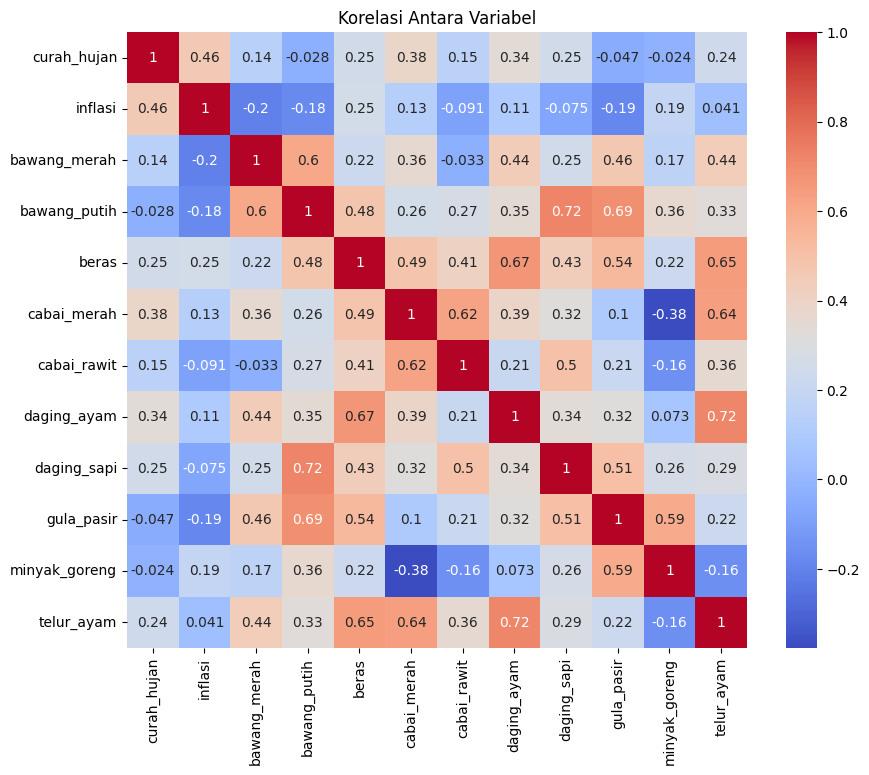

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Korelasi Antara Variabel")
plt.show()


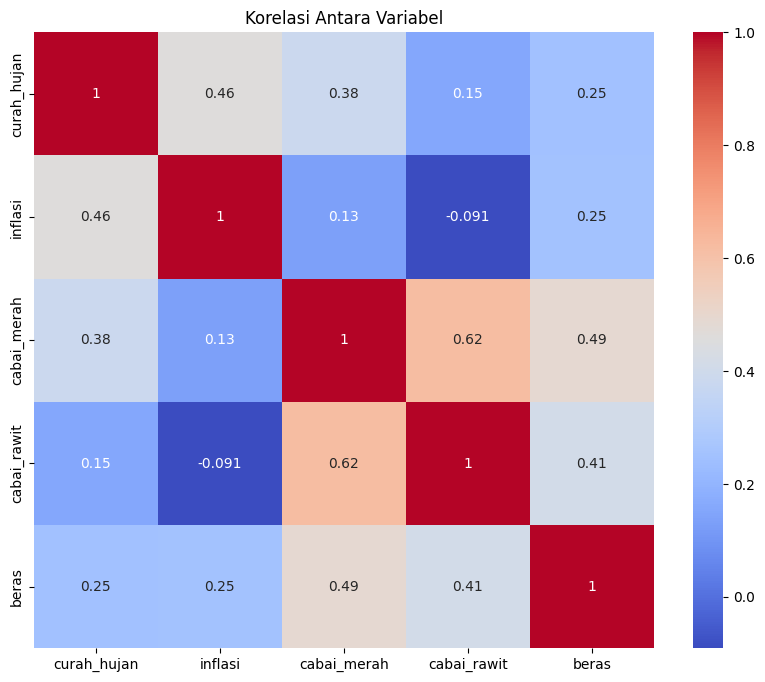

In [31]:
import seaborn as sns
core = data[['curah_hujan', 'inflasi', 'cabai_merah', 'cabai_rawit', 'beras']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(core, annot=True, cmap='coolwarm')
plt.title("Korelasi Antara Variabel")
plt.show()

In [32]:
import plotly.express as px

kolom_komoditas = ['inflasi', 'curah_hujan']

df_long = data.melt(
    id_vars=['provinsi', 'bulan'],
    value_vars=kolom_komoditas,
    var_name='komoditas',
    value_name='harga'
)

# Plot boxplot
fig = px.box(df_long, x='komoditas', y='harga', title='Boxplot  Inflasi dan Curah Hujan',
             labels={'komoditas': 'Jenis Komoditas', 'harga': 'Harga (Rp)'})

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [33]:
komoditas = [
    'bawang_merah','bawang_putih','beras','cabai_rawit','cabai_merah',
    'daging_ayam','daging_sapi','gula_pasir','minyak_goreng','telur_ayam'
]

df_long = data.melt(
    id_vars=['provinsi', 'bulan'],
    value_vars=komoditas,
    var_name='komoditas',
    value_name='harga'
)

# Plot boxplot
fig = px.box(df_long, x='komoditas', y='harga', title='Boxplot Harga Bahan Pangan Pokok',
             labels={'komoditas': 'Jenis Komoditas', 'harga': 'Harga (Rp)'})

fig.update_layout(xaxis_tickangle=-45)
fig.show()

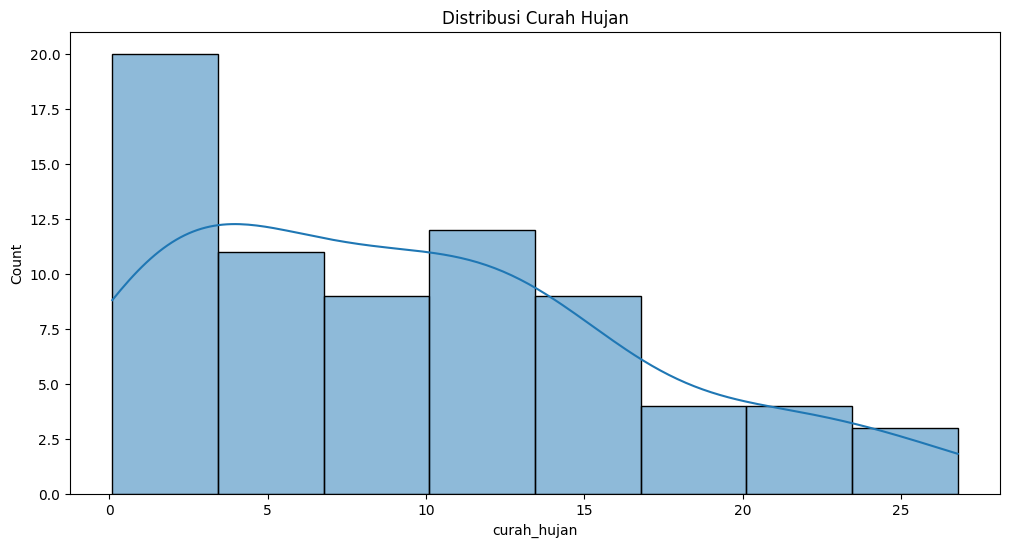

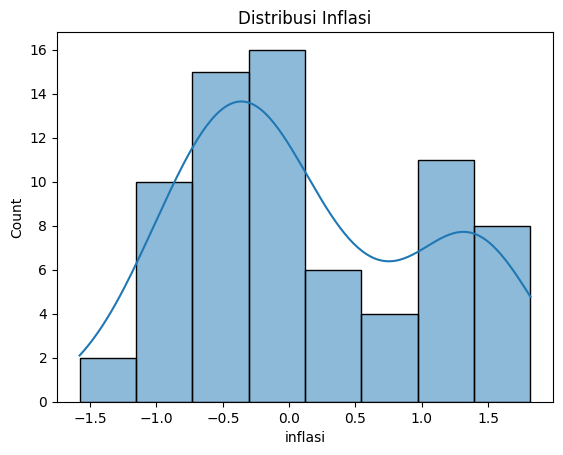

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(data['curah_hujan'], kde=True)
plt.title("Distribusi Curah Hujan")
plt.show()

sns.histplot(data['inflasi'], kde=True)
plt.title("Distribusi Inflasi")
plt.show()

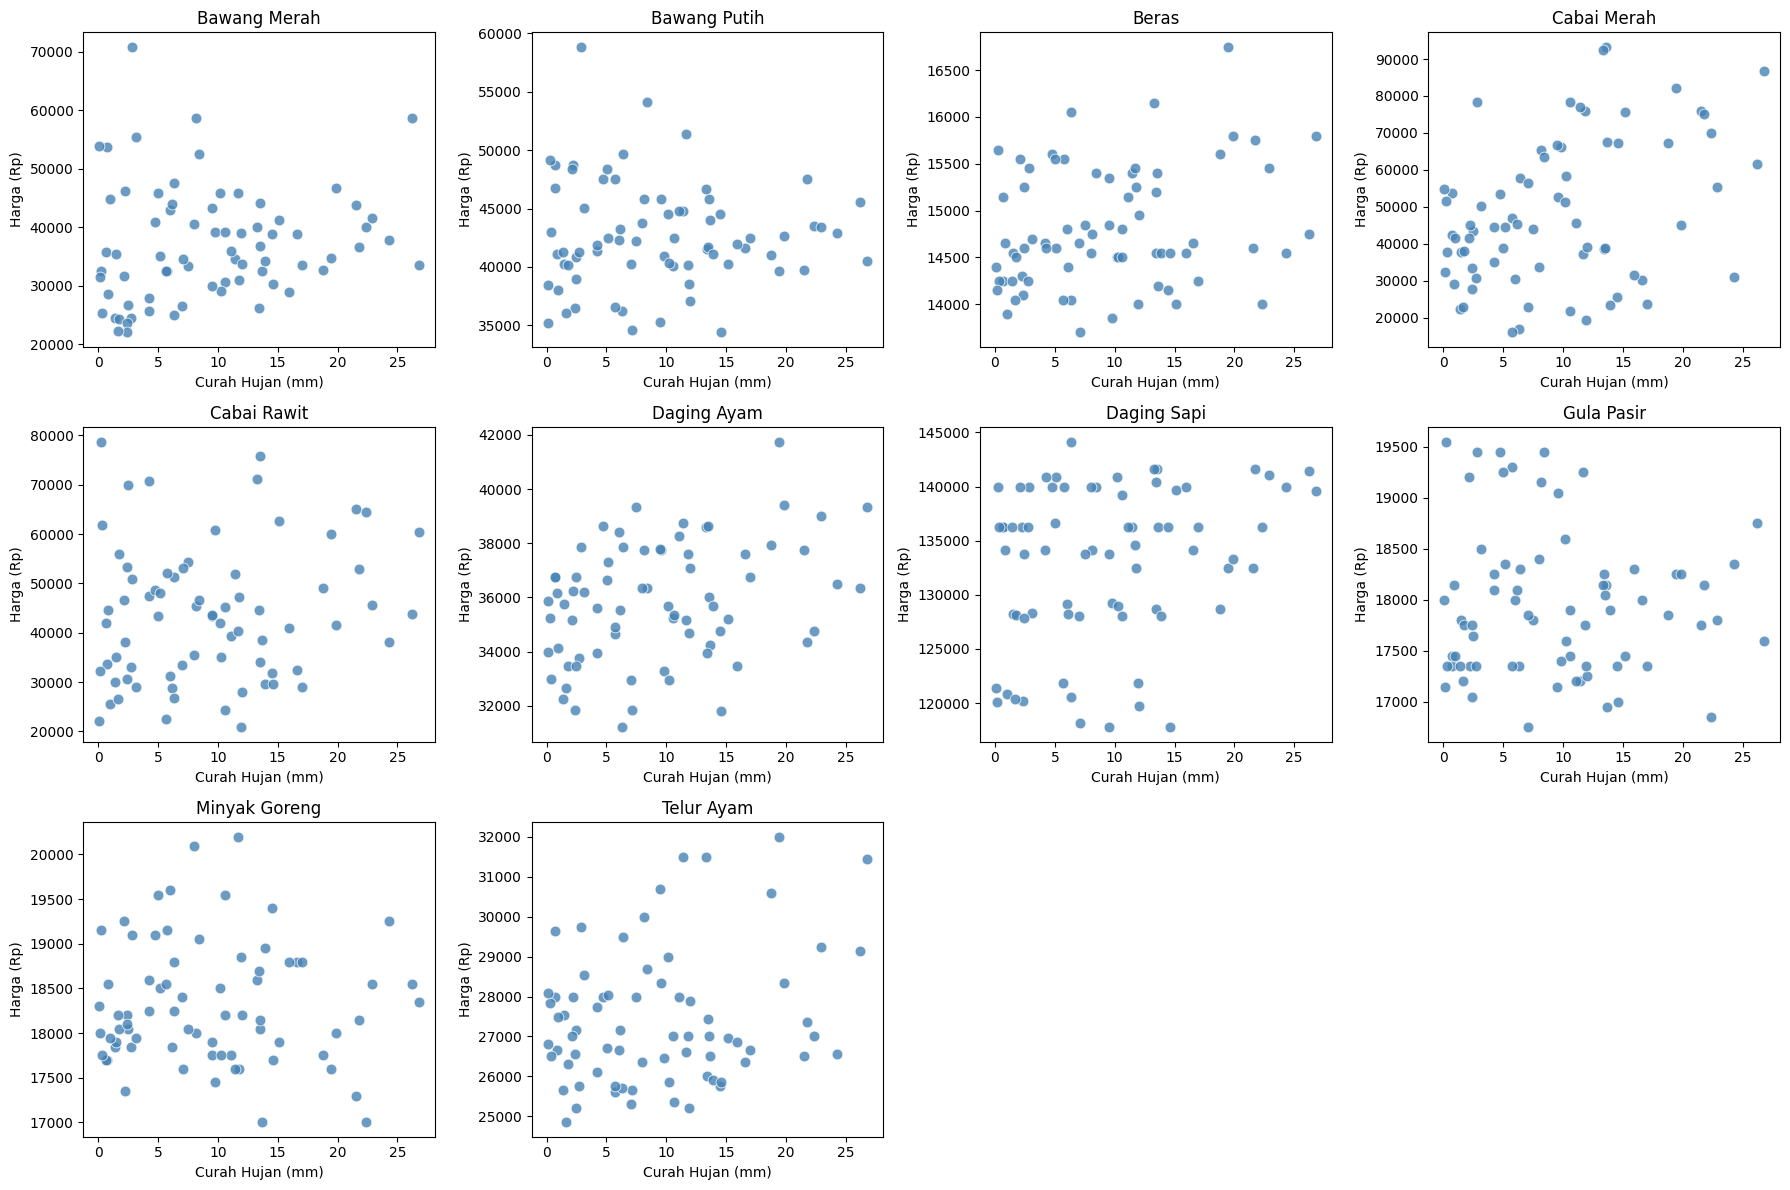

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = data.copy()

komoditas_cols = [
    "bawang_merah", "bawang_putih", "beras", "cabai_merah", "cabai_rawit",
    "daging_ayam", "daging_sapi", "gula_pasir", "minyak_goreng", "telur_ayam"
]

df_long = df.melt(
    id_vars=["provinsi", "bulan", "curah_hujan", "inflasi"],
    value_vars=komoditas_cols,
    var_name="komoditas",
    value_name="harga"
)

kom_list = df_long["komoditas"].unique()
n = len(kom_list)

cols = 4
rows = math.ceil(n / cols)

plt.figure(figsize=(18, rows * 4))

for i, kom in enumerate(kom_list, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(
        data=df_long[df_long["komoditas"] == kom],
        x="curah_hujan",
        y="harga",
        s=60,
        color="steelblue",
        alpha=0.8
    )
    plt.title(kom.replace("_", " ").title())
    plt.xlabel("Curah Hujan (mm)")
    plt.ylabel("Harga (Rp)")

plt.tight_layout()
plt.show()


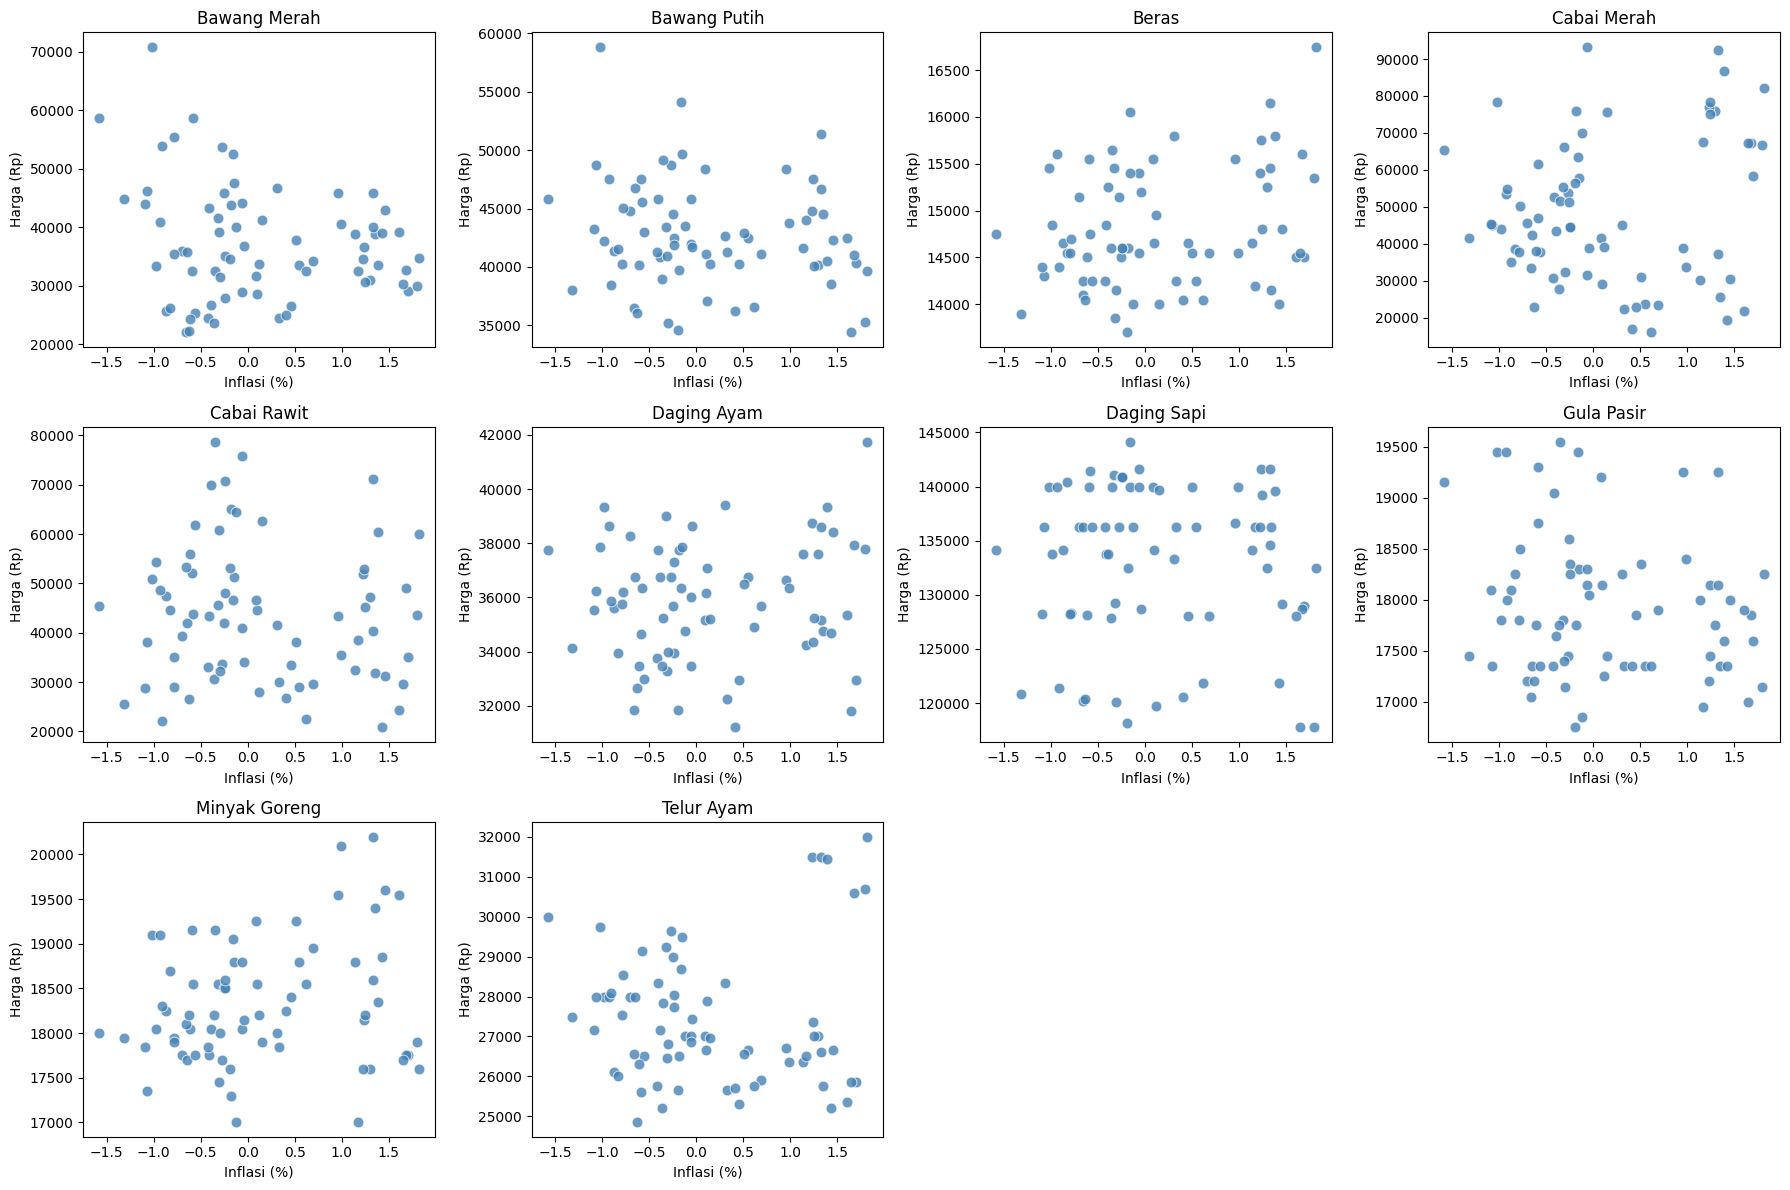

In [36]:
kom_list = df_long["komoditas"].unique()
n = len(kom_list)

cols = 4
rows = math.ceil(n / cols)

plt.figure(figsize=(18, rows * 4))

for i, kom in enumerate(kom_list, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(
        data=df_long[df_long["komoditas"] == kom],
        x="inflasi",
        y="harga",
        s=60,
        color="steelblue",
        alpha=0.8
    )
    plt.title(kom.replace("_", " ").title())
    plt.xlabel("Inflasi (%)")
    plt.ylabel("Harga (Rp)")

plt.tight_layout()
plt.show()

In [37]:
import plotly.express as px

fig = px.line(
    df,
    x="bulan",
    y="inflasi",
    color="provinsi",
    markers=True,
    title="Perubahan Inflasi per Bulan di Setiap Provinsi",
    labels={"bulan": "Bulan", "curah_hujan": "Curah Hujan (mm)"}
)

fig.show()


In [38]:
import plotly.express as px

fig = px.line(
    df,
    x="bulan",
    y="curah_hujan",
    color="provinsi",
    markers=True,
    title="Perubahan Curah Hujan per Bulan di Setiap Provinsi",
    labels={"bulan": "Bulan", "curah_hujan": "Curah Hujan (mm)"}
)

fig.show()
